[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/2.2.%20KRX%20%EC%A0%84%EC%B2%B4%20%EC%A2%85%EB%AA%A9%EB%B6%84%EC%84%9D-input.ipynb)

## 한국거래소(KRX) 전체 종목 분석
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* FinanceDataReader를 통한 KRX 전체 종목 수집
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## ⚠️ 주의할 점 ⚠️ 
* 강좌의 분석내용과 여러분의 실습 결과는 시점의 차이로 빈도수 등의 결과값이 다르게 나옵니다.



## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
import pandas as pd
import seaborn as sns

## FinanceDataReader 로 수집한 전체 종목 불러오기

* 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)
* https://pandas-datareader.readthedocs.io/en/latest/readers/index.html

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

## <font color="red">종목명이 영문으로 표기될 때</font>

해당 수업은 실시간으로 한국거래소에서 FinanceDataReader 라는 라이브러리를 통해 데이터를 받아오고 있습니다.
아래 링크에 있는 라이브러리의 소스코드가 KRX 전체 종목을 가져오는 소스코드입니다.

[FinanceDataReader/listing.py at master · FinanceData/FinanceDataReader](https://github.com/FinanceData/FinanceDataReader/blob/master/krx/listing.py)

이 때, 전체 상장종목과 거래할 수 있는 ETF 등의 종목도 함께 가져오게 되는데,
FinanceDataReader 에서는 코스피, 코스닥, 코넥스 정보가 있는 엑셀파일과 금융상품 정보가 있는 JSON 데이터를 가져와서 병합하는 형태로 데이터를 제공하고 있습니다.
그런데 최근 JSON 데이터의 종목명이 영문으로 변경되어 제공되고 있음을 확인했습니다.
그래서 아래의 엑셀 데이터를 read_html 로 읽어오게 되면 한글로 된 종목명을 받아서 분석해 보실 수 있습니다.

In [2]:
# # 종목명이 영문으로 표기 될 때 아래의 주석을 풀고 데이터를 받아서 분석해 보세요!
# url = 'http://kind.krx.co.kr/corpgeneral/corpList.do?method=download&searchType=13'
# df_listing = pd.read_html(url, header=0)[0]
# cols_ren = {'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
#                     '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
#                     '홈페이지':'HomePage', '지역':'Region', }
# df = df_listing.rename(columns = cols_ren)
# df['Symbol'] = df['Symbol'].apply(lambda x: '{:06d}'.format(x))
# df['ListingDate'] = pd.to_datetime(df['ListingDate'])
# df

In [3]:
# 이전 강좌에서 to_csv로 저장해둔 krx.csv 파일을 pd.read_csv 로 불러옵니다.
# krx 파일이 없다면 아래 주석을 제거하고 csv 파일을 로드해 보세요!
# df = pd.read_csv("https://raw.githubusercontent.com/corazzon/finance-data-analysis/main/krx.csv")
# df

df = pd.read_csv("krx.csv", dtype={'Symbol':object})
df.shape

(2639, 9)

### 일부 데이터만 가져오기

{'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
                            '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
                            '홈페이지':'HomePage', '지역':'Region', }

In [4]:
# head 로 위에 있는 데이터 일부만 가져옵니다.
df.head(2)

,Name,Symbol,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시


In [5]:
# tail 로 아래 있는 데이터 일부만 가져옵니다.
df.tail(2)

,Name,Symbol,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2637,테크엔,308700,전구 및 조명장치 제조업,LED조명장치,2018-12-21,12월,"이지원,박철(각자 대표이사)",http://www.techen.co.kr,대구광역시
2638,한국미라클피플사,331660,기타 화학제품 제조업,"은나노스텝, 닥터오렌지 등",2019-10-28,12월,이호경,http://www.kmpc.co.kr,경기도


In [6]:
# sample을 사용하면 랜덤하게 ()안의 갯수만큼 가져옵니다. 
# ()안에 값을 써주지 않으면 한 개만 가져옵니다.
df.sample(2)

,Name,Symbol,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1092,유안타증권,003470,금융 지원 서비스업,"유가증권 매매,중개,대리,인수",1988-01-21,12월,궈밍쩡,http://www.yuantakorea.com,서울특별시
632,조이시티,067000,소프트웨어 개발 및 공급업,온라인게임(프리스타일농구),2008-05-30,12월,조성원,http://www.joycity.com,경기도


## 데이터 요약하기

In [7]:
# info 로 요약 데이터를 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Name            2639 non-null   object
 1   Symbol          2639 non-null   object
 2   Sector          2639 non-null   object
 3   Industry        2624 non-null   object
 4   ListingDate     2639 non-null   object
 5   SettleMonth     2639 non-null   object
 6   Representative  2639 non-null   object
 7   HomePage        2466 non-null   object
 8   Region          2639 non-null   object
dtypes: object(9)
memory usage: 185.7+ KB


In [8]:
# describe 로 기술통계값을 봅니다.
df.describe()

,Name,Symbol,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,2639,2639,2639,2624,2639,2639,2639,2466,2639
unique,2611,2611,159,2411,1942,10,2494,2418,23
top,바이오프로테크,199290,소프트웨어 개발 및 공급업,기업인수합병,1976-06-30,12월,김종현,http://pharmaresearch.co.kr,서울특별시
freq,2,2,168,40,8,2577,5,2,1059


In [9]:
# 중복을 제외한 unique 값의 갯수를 봅니다.
df.nunique()

Name              2611
Symbol            2611
Sector             159
Industry          2411
ListingDate       1942
SettleMonth         10
Representative    2494
HomePage          2418
Region              23
dtype: int64

In [10]:
# index 값 보기
df.index

RangeIndex(start=0, stop=2639, step=1)

In [11]:
# 컬럼값 보기
df.columns

Index(['Name', 'Symbol', 'Sector', 'Industry', 'ListingDate', 'SettleMonth',
       'Representative', 'HomePage', 'Region'],
      dtype='object')

In [12]:
# 값만 보기
df.values

array([['AJ네트웍스', '095570', '산업용 기계 및 장비 임대업', ..., '손삼달',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['BNK금융지주', '138930', '기타 금융업', ..., '빈대인',
        'http://www.bnkfg.com', '부산광역시'],
       ['DSR', '155660', '1차 비철금속 제조업', ..., '홍석빈', 'http://www.dsr.com',
        '부산광역시'],
       ...,
       ['타임기술', '318660', '소프트웨어 개발 및 공급업', ..., '주양효',
        'http://timett.co.kr', '경상남도'],
       ['테크엔', '308700', '전구 및 조명장치 제조업', ..., '이지원,박철(각자 대표이사)',
        'http://www.techen.co.kr', '대구광역시'],
       ['한국미라클피플사', '331660', '기타 화학제품 제조업', ..., '이호경',
        'http://www.kmpc.co.kr', '경기도']], dtype=object)

## 데이터 색인하기

### Series
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [13]:
# Name 컬럼 하나만 가져옵니다.
df['Name']

0          AJ네트웍스
1         BNK금융지주
2             DSR
3              GS
4       HDC현대산업개발
          ...    
2634       카이바이오텍
2635       코스텍시스템
2636         타임기술
2637          테크엔
2638     한국미라클피플사
Name: Name, Length: 2639, dtype: object

In [14]:
# df["Name"] 의 type을 봅니다.
type(df['Name'])

pandas.core.series.Series

In [15]:
# 0번째 행만 가져옵니다. 행인덱스를 가져올때는 .loc를 사용합니다.
# loc는 위치(locate)를 의미합니다.
df.loc[0]

Name                              AJ네트웍스
Symbol                            095570
Sector                   산업용 기계 및 장비 임대업
Industry             렌탈(파렛트, OA장비, 건설장비)
ListingDate                   2015-08-21
SettleMonth                          12월
Representative                       손삼달
HomePage          http://www.ajnet.co.kr
Region                             서울특별시
Name: 0, dtype: object

In [16]:
# df.loc[0] 의 type을 봅니다.
type(df.loc[0])

pandas.core.series.Series

### DataFrame
<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">

In [17]:
# df 변수의 타입을 봅니다.
type(df)

pandas.core.frame.DataFrame

In [18]:
# 여러 컬럼을 지정할 때는 리스트 형태로 묶어주어야 합니다. 
# 2차원 행렬은 대괄호가 [] 2개가 있다는 것을 기억해 주세요. 
df[['Symbol', 'Name']]

,Symbol,Name
0,095570,AJ네트웍스
1,138930,BNK금융지주
2,155660,DSR
3,078930,GS
4,294870,HDC현대산업개발
...,...,...
2634,446600,카이바이오텍
2635,169670,코스텍시스템
2636,318660,타임기술
2637,308700,테크엔


In [19]:
# 여러 개의 행을 가져올 때도 [] 대괄호를 통해 리스트 형태로 묶어줍니다.
df.loc[[0,1,2,5]]

,Name,Symbol,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,AJ네트웍스,095570,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,손삼달,http://www.ajnet.co.kr,서울특별시
1,BNK금융지주,138930,기타 금융업,금융지주회사,2011-03-30,12월,빈대인,http://www.bnkfg.com,부산광역시
2,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시
5,HD한국조선해양,009540,기타 금융업,"선박,해양구조물,엔진,펌프 전동기,중전기,중장비 제조/자동창고,물류시스템",1999-08-24,12월,"가삼현, 정기선 (각자 대표이사)",http://www.ksoe.co.kr,경기도


In [20]:
# 1개의 컬럼을 가져올 때도 대괄호[] 2개를 써서 리스트 형태로 묶어주게 되면 데이터프레임 형태로 반환됩니다.
# "Name" 을 데이터프레임으로 가져옵니다.
df[['Name']]

,Name
0,AJ네트웍스
1,BNK금융지주
2,DSR
3,GS
4,HDC현대산업개발
...,...
2634,카이바이오텍
2635,코스텍시스템
2636,타임기술
2637,테크엔


In [21]:
type(df[['Name']])

pandas.core.frame.DataFrame

### loc를 통한 서브셋 가져오기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [22]:
# 행과 열 함께 가져오기
# .loc[행, 열]
df.loc[0,"Name"] # 이 방법을 더 추천

'AJ네트웍스'

In [23]:
# .loc[행, 열]
df.loc[1]["Name"]

'BNK금융지주'

In [24]:
# %timeit
%timeit df.loc[0,"Name"]

5.84 µs ± 92.2 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [25]:
# %timeit
%timeit df.loc[1]["Name"]

27.4 µs ± 83.6 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [26]:
# 여러 개의 행과 하나의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0,1,2], "Name"]

0     AJ네트웍스
1    BNK금융지주
2        DSR
Name: Name, dtype: object

In [27]:
# 여러개의 행과 여러 개의 컬럼 가져오기
# .loc[행, 열]
df.loc[[0,1,2], ["Symbol","Name"]]

,Symbol,Name
0,095570,AJ네트웍스
1,138930,BNK금융지주
2,155660,DSR


### Boolean Indexing
* 결과값이 True, False bool 형태로 반환되기 때문에 boolean indexing 이라고 부릅니다.
* boolean indexing 을 사용해 특정 조건식을 만족하는 데이터를 서브셋으로 가져옵니다.

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg">

In [28]:
# 카카오를 찾습니다.
df.loc[df["Name"] == '카카오']

,Name,Symbol,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
1411,카카오,035720,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,홍은택 대표이사,http://www.kakaocorp.com,제주특별자치도


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [30]:
# and => &
# or => |
# True and False

False

In [39]:
# 서울특별시에 소재지를 두고 있는 KOSPI 종목의 종목명과 심볼을 가져옵니다.
# .loc[행, 열]
# .loc[조건식, 열]
# df.loc[(df["Region"] == "서울특별시") & (df["Market"] == "KOSPI"), ["Symbol", "Name"]]

seoul = df.loc[(df["Region"] == "서울특별시"),["Symbol","Name"]]

,Symbol,Name
0,095570,AJ네트웍스
3,078930,GS
4,294870,HDC현대산업개발
8,025000,KPX케미칼
9,058860,KTis
...,...,...
2624,243870,굿센
2625,176750,듀켐바이오
2626,238500,로보쓰리에이아이앤로보틱스
2628,390110,애니메디솔루션


## 파생변수 만들기

In [44]:
# pd.to_datetime 을 통해 데이터의 타입을 변환합니다.
df['ListingDate'] = pd.to_datetime(df['ListingDate'])
df['ListingDate'].head(1)

0   2015-08-21
Name: ListingDate, dtype: datetime64[ns]

In [46]:
# ListingYear 파생변수 만들기
df['ListingYear'] = df['ListingDate'].dt.year 
df['ListingYear'].tail(5)

#결측치가 있으면, float64
#결측치가 없으면, int64

2634    2022
2635    2022
2636    2021
2637    2018
2638    2019
Name: ListingYear, dtype: int64

In [48]:
# nan은 not a number의 약자로 결측치를 의미합니다.
import numpy as np
type(np.nan)

float

In [51]:
df[['ListingDate','ListingYear']].dtypes

ListingDate    datetime64[ns]
ListingYear             int64
dtype: object

## 데이터 시각화 툴 소개

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## 데이터 시각화를 위한 폰트설정

In [52]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [53]:
# 위에서 만든 함수를 통해 시스템 폰트를 불러옵니다.
get_font_family()

'Malgun Gothic'

In [65]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.
import matplotlib.pyplot as plt
font_family = get_font_family()
# 폰트설정
plt.rc("font", family = font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\petpulslab\AppData\Local\Temp\ipykernel_13872\3938896292.py:14: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


### 폰트 설정 확인하기

<Axes: title={'center': '한글폰트'}>

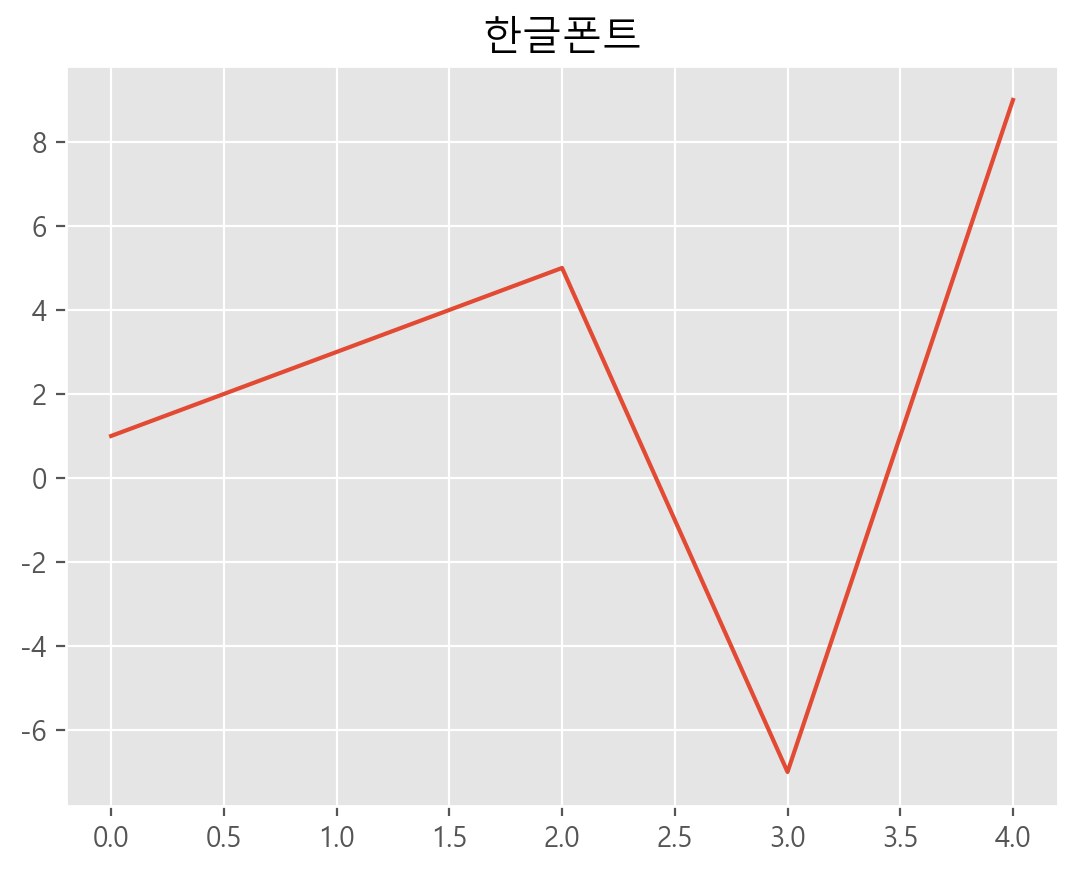

In [66]:
# 한글폰트 확인하기
pd.Series([1,3,5,-7,9]).plot(title = '한글폰트')

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [67]:
# Market column에 어떤 데이터들이 있는지 unique로 확인합니다.
df['Region'].unique()

array(['서울특별시', '부산광역시', '경기도', '울산광역시', '경상남도', '인천광역시', '전라북도', '대구광역시',
       '충청남도', '세종특별자치시', '충청북도', '경상북도', '강원도', '강원특별자치도', '대전광역시',
       '케이맨 제도', '미국', '광주광역시', '제주특별자치도', '전라남도', '일본', '홍콩', '싱가포르'],
      dtype=object)

In [68]:
# value_counts()로 빈도수를 구합니다.
df['Region'].value_counts()

서울특별시      1059
경기도         750
충청남도        103
인천광역시        93
경상남도         92
충청북도         88
부산광역시        78
경상북도         67
대구광역시        56
대전광역시        52
전라북도         32
강원도          28
강원특별자치도      28
울산광역시        27
전라남도         22
광주광역시        21
세종특별자치시      12
제주특별자치도       9
홍콩            8
미국            6
케이맨 제도        5
일본            2
싱가포르          1
Name: Region, dtype: int64

<Axes: >

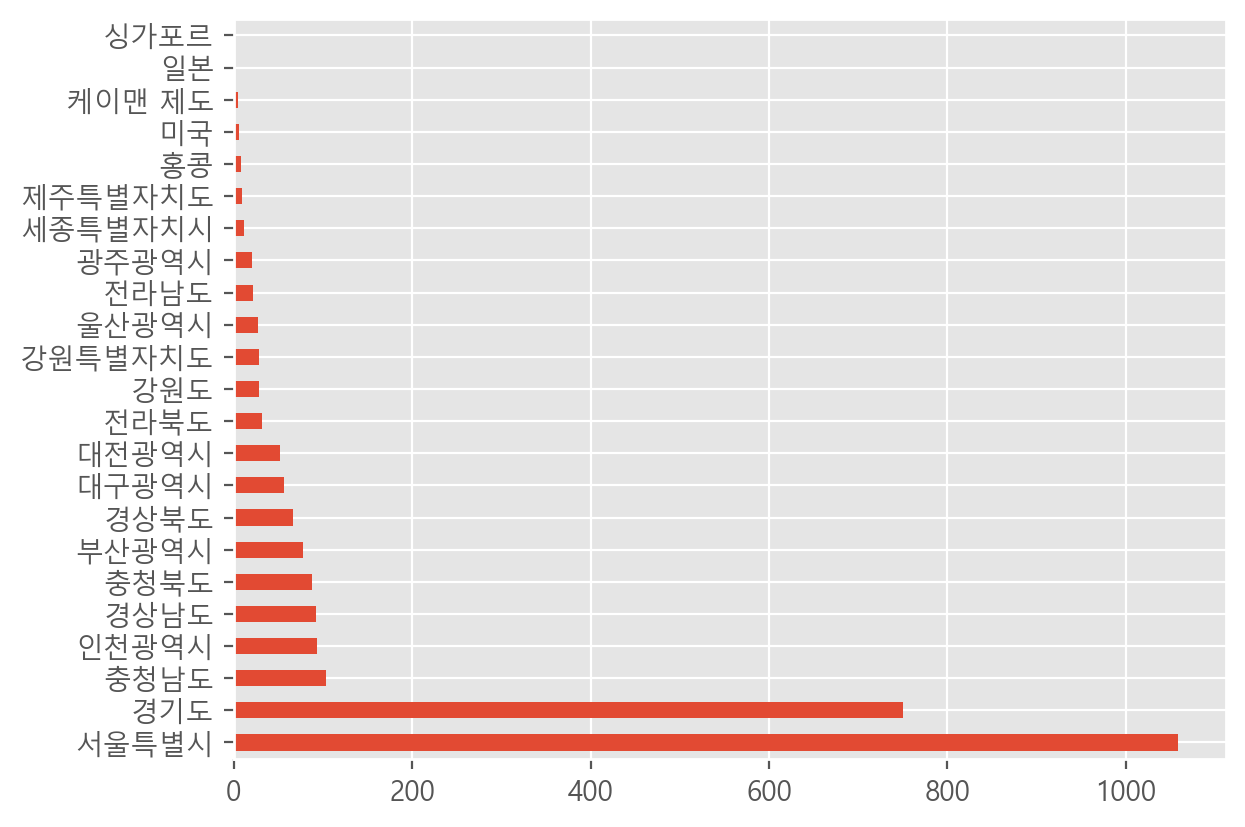

In [72]:
# 빈도수를 시각화 합니다.
# df['Region'].value_counts().plot.bar() # rot=0 : 글씨 가로로 볼 수 있음
df['Region'].value_counts().plot.barh() 

<Axes: xlabel='count', ylabel='Region'>

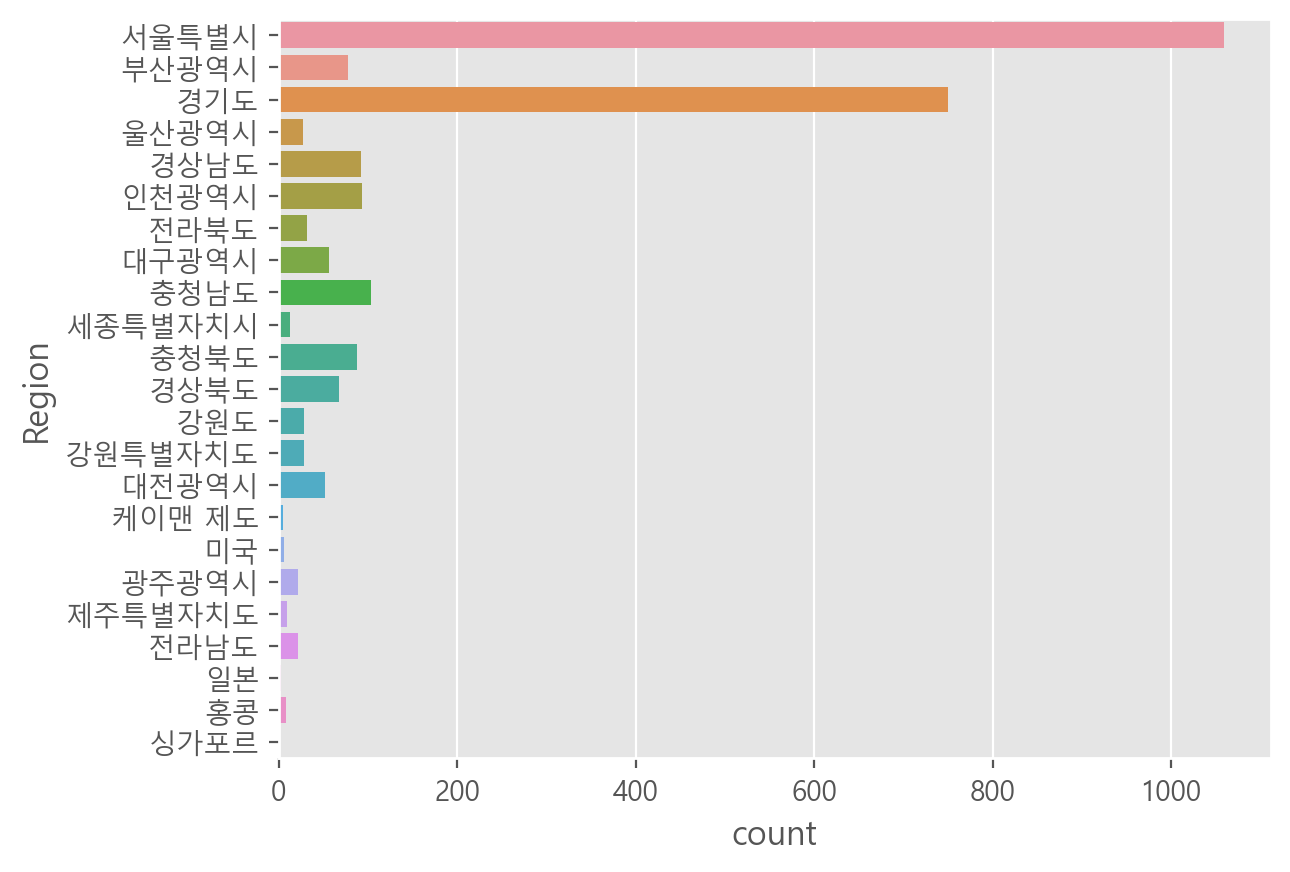

In [80]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# x축 기준 막대그래프 
# plt.xticks(rotation = 90) # x축 레이블 회전
# sns.countplot(data=df, x='Region')

# y축 기준 막대그래프
sns.countplot(data=df, y='Region')

### Sector

In [ ]:
# 섹터의 빈도수를 구합니다.
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당합니다.
# sector_count_top


In [ ]:
# df_sector_30

In [ ]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.


In [ ]:
print(plt.colormaps())

In [ ]:
# 빈도수가 가장 많은 데이터 색인하기


### Industry

In [ ]:
# Industry 의 빈도수를 구합니다.
# industry_top30

In [ ]:
# Industry 빈도수를 pandas 의 plot 기능을 사용해 시각화 합니다.


In [ ]:
# df[df["Industry"].isin(industry_top30.index)]

In [ ]:
# seaborn


### Region 

In [ ]:
# Region 의 빈도수를 구합니다.
# value_counts()통해 지역별 상장회사의 빈도수를 봅니다.


In [ ]:
# df["Region"]


In [ ]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그립니다.


In [ ]:
# order 기능을 통해 빈도수를 정렬합니다.
# df["Region"].value_counts().index 로 Region 의 순서를 가져와서 지정합니다.


In [ ]:
# Region 을 기준으로 정렬합니다.


## 두 개의 변수 빈도수 구하고 시각화 하기
* crosstab 으로 빈도수 구하기
* seaborn의 countplot 으로 빈도수 시각화
* pandas의 plot 기능으로 시각화
    * lineplot : 연속된 데이터(숫자, 기간)
    * barplot : 비연속 데이터(범주형)
    * hist : 연속된 수치 데이터의 범주화

### 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기

In [ ]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
# Market 과 Region 으로 빈도수 구하기


In [ ]:
# countplot : Market 과 Region 으로 빈도수 시각화 하기


### 연도별 상장 종목 빈도수 분석

In [ ]:
# Market, ListingYear 빈도수 구하기
# market_year

### seaborn을 통한 빈도수 시각화

In [ ]:
# Seaborn countplot 활용하여 빈도수를 표현합니다.
# hue 를 사용해 다른 변수를 함께 표현합니다. hue는 색상을 의미합니다.


### Pandas를 통한 시각화

In [ ]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그립니다.
# Pandas plot으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어갑니다.
# 컬럼이 여러개라면 다른 색상으로 그려집니다.


In [ ]:
# 컬럼값을 subplots 으로 그립니다.


In [ ]:
# Pandas plot 기능 활용하여 막대 그래프(bar, barh)를 그립니다.


In [ ]:
# 컬럼명의 데이터 타입을 int 형태로 변경합니다.
# market_year.columns


In [ ]:
# 막대(bar)그래프 그리기
# market_year


### groupby 와 pivot_table로 빈도수 구하기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/06_valuecounts.svg">

* [How to calculate summary statistics? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)
* [Group by: split-apply-combine — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* [pandas.pivot_table — pandas 1.2.0 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [ ]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
# market_year

In [ ]:
# pivot_table로 같은 결과가 나오게 연산하기


In [ ]:
# 위의 groupby 결과를 scatterplot으로 그립니다.
# df_market_year


In [ ]:
# lineplot 그리기


In [ ]:
# relplot으로 subplot 그리기 - scatter


In [ ]:
# relplot으로 subplot 그리기 - line


### 구간화 binnig 과 히스토그램
* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

In [ ]:
# bins 의 갯수에 따라 그래프의 표현 방법이 달라집니다.


## 데이터 색인

In [ ]:
# 케이맨 제도에 있는 회사 찾기


In [ ]:
# 1970년 이전에 상장한 기업을 찾습니다.


In [ ]:
# and => &
# or  => |
True and True

In [ ]:
# 2020년 상장한 서울특별시에 소재한 코스피 종목을 찾습니다.


### 지역별 섹터

In [ ]:
# Sector, Region 으로 crosstab 연산을 합니다.
# df_sr


### 컬럼과 인덱스 값으로 색인하기

In [ ]:
# 특정 컬럼만 가져오기


### 특정 행만 가져오기

* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [ ]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기


In [ ]:
# loc 로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기


In [ ]:
# loc 로 행, 컬럼 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"
# 열에서 "서울특별시" 가져오기



In [ ]:
# loc로 여러 행과 열 가져오기


In [ ]:
# "소프트웨어 개발 및 공급업" 만 가져와서 막대그래프를 그립니다.


In [ ]:
# "의약품 제조업" 만 가져와서 막대그래프를 그립니다.



In [ ]:
# iloc[행]
# iloc[행,열]


In [ ]:
# df.head 혹은 tail도 내부에서 iloc를 슬라이싱으로 사용하고 있습니다.
# df.head??

In [ ]:
# df_sr.tail??